### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head(160)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
157,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,0
158,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [56]:
t1 = pd.isnull(['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data.fillna({'Bar':'never','CoffeeHouse':'never','CarryAway':'never','RestaurantLessThan20':'never','Restaurant20To50':'never'},inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



<AxesSubplot:ylabel='Y'>

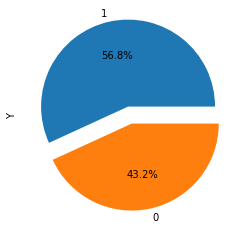

In [8]:
#data.groupby('Y').size()*100/data['Y'].count()
data['Y'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct="%0.1f%%")

5. Use a bar plot to visualize the `coupon` column.

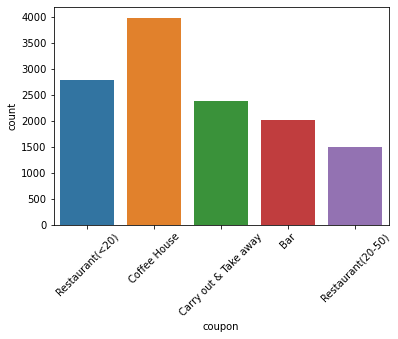

In [9]:
coupon_bar = sns.countplot(data=data, x='coupon')
coupon_bar.tick_params(axis='x', rotation=45)

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

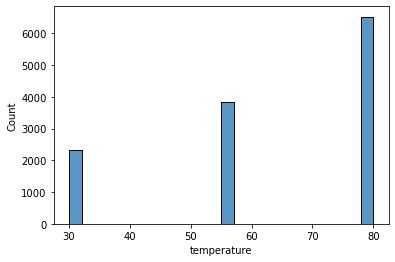

In [10]:
sns.histplot(data=data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
#Create a new dataframe that contains just the Bar coupons
bar_data=data.query("coupon == 'Bar'")
bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


<AxesSubplot:ylabel='Y'>

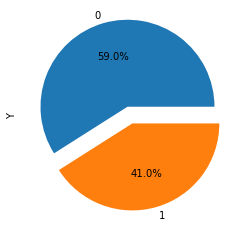

In [14]:
#This graph shows the proportion of bar coupon acceptance
#bar_data.groupby('Y').size()*100/bar_data['Y'].count()
bar_data['Y'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct="%0.1f%%")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<AxesSubplot:xlabel='Bar'>

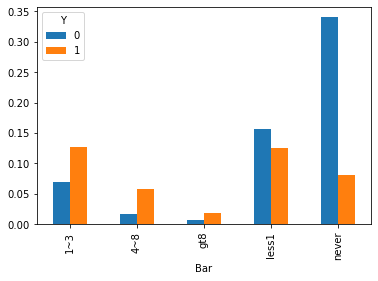

In [19]:
#This graph compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more
pd.crosstab(bar_data.Bar, bar_data.Y, normalize=True).plot(kind='bar')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<AxesSubplot:title={'center':'Occasional Bar visitor / All age'}, xlabel='Bar', ylabel='count'>

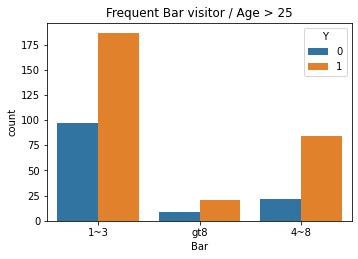

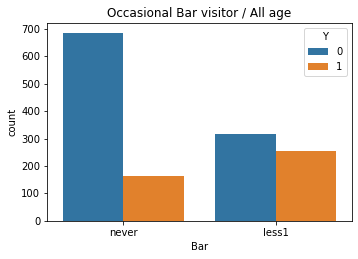

In [55]:
#Compare the acceptance rate between drivers who go to a bar more than once a month 
#and are over the age of 25 to the all others
#
#Local variables used in the query
bar_type = ['never','less1']
agelimit =  ['below21','21']

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Frequent Bar visitor / Age > 25')
sns.countplot(data=bar_data.query('Bar not in @bar_type & age not in @agelimit'),x='Bar',hue='Y')

plt.figure(figsize=(12,8))
plt.subplot(222)
plt.title('Occasional Bar visitor / All age')
sns.countplot(data=bar_data.query('Bar in @bar_type'),x='Bar',hue='Y')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<AxesSubplot:title={'center':'Occasional Bar visitor / With kids / Farming, Fishing, Forestry'}, xlabel='Bar', ylabel='count'>

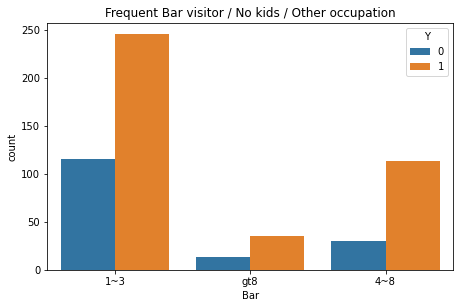

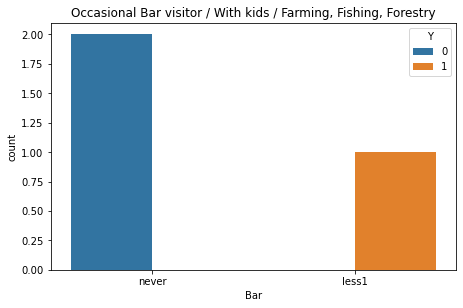

In [43]:
# compare the acceptance rate between drivers who go to bars more than once a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry
#
# Local variables
bar_type_2 = ['never','less1']
kids_2 = ['Kid(s)']
occupation_2 =  ['Farming Fishing & Forestry']

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('Frequent Bar visitor / No kids / Other occupation')
sns.countplot(data=bar_data.query('Bar not in @bar_type_2 & passanger not in @kids_2 & occupation not in  @occupation_2'),x='Bar',hue='Y')

plt.figure(figsize=(16,10))
plt.subplot(222)
plt.title('Occasional Bar visitor / With kids / Farming, Fishing, Forestry')
sns.countplot(data=bar_data.query('Bar in @bar_type_2 & passanger in @kids_2 and occupation in @occupation_2'),x='Bar',hue='Y')



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<AxesSubplot:title={'center':'Like cheap restaurants and income < 50K'}, xlabel='RestaurantLessThan20', ylabel='count'>

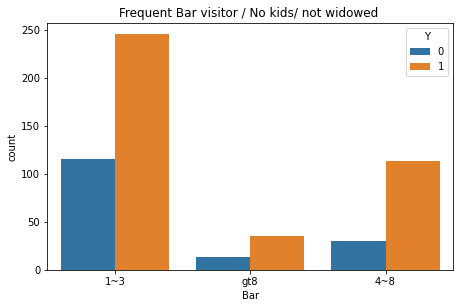

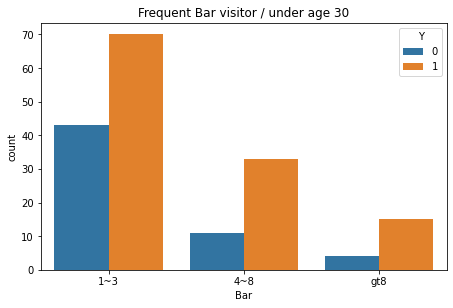

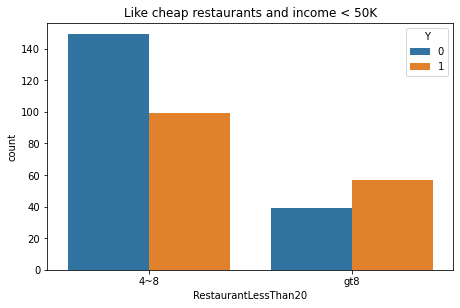

In [50]:
#Compare the acceptance rates between those drivers who:
# - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
# - go to bars more than once a month and are under the age of 30 *OR*
# - go to cheap restaurants more than 4 times a month and income is less than 50K. 
#
# Local variables

bar_type_3 = ['never','less1']
kids_3 = ['Kid(s)']
married_3 =  ['Widowed']
cheap_3 = ['4~8','gt8']
income_3=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
age_3 = ['below21', '21']

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('Frequent Bar visitor / No kids/ not widowed ')
sns.countplot(data=bar_data.query('Bar not in @bar_type_3 & passanger not in @kids_3 & maritalStatus not in @married_3'),x='Bar',hue='Y')

plt.figure(figsize=(16,10))
plt.subplot(222)
plt.title('Frequent Bar visitor / under age 30')
sns.countplot(data=bar_data.query('Bar not in @bar_type_3 & age in @age_3'),x='Bar',hue='Y')

plt.figure(figsize=(16,10))
plt.subplot(223)
plt.title('Like cheap restaurants and income < 50K')
sns.countplot(data=bar_data.query('RestaurantLessThan20 in @cheap_3 and income in @income_3'),x='RestaurantLessThan20',hue='Y')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Following are hypothesis about drivers who accepted bar coupons :
#    1. Chance of accepting bar coupon is 40%
#    2. Chances of accepting coupon for drivers are high if they go to bar 3 or fewer times in a month
#    3. Chances of NOT accepting bar coupon are very high if the driver vistis bar less than once in a month.
#    4. Drivers over age 25 has most chances of accepting coupon if they visit bar moderately ( 1 to 3 times ).
#    5. Chances of accepting coupon for drivers are high if they visit bar moderately ( 1 to 3 times ) and driving without kids
#    6. Farmers and fishers may get coupons even if they are driving with kids.
#    7. Drivers who are frequent bar visitors and under age 30, uses coupon frequently.
#    8. Chance of using coupon is less fro drivers who visits cheap restaurants and income is under 50K

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [57]:
#Create a new dataframe that contains just the Coffee House coupons
coffee_data=data.query("coupon == 'Coffee House'")
coffee_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


<AxesSubplot:ylabel='Y'>

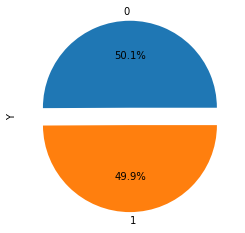

In [58]:
#This graph shows the proportion of Coffee House coupon acceptance
coffee_data['Y'].value_counts().plot(kind='pie', explode=[0.1,0.1], autopct="%0.1f%%")

<AxesSubplot:title={'center':'Acceptance per coffee user frequency'}, xlabel='CoffeeHouse'>

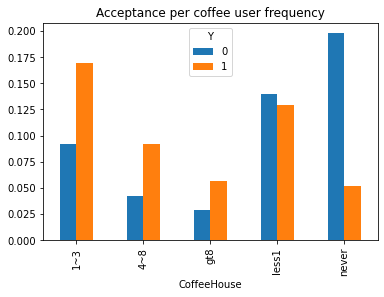

In [67]:
#This graph compare the acceptance rate between frequency of visits to coffee house
pd.crosstab(coffee_data.CoffeeHouse, coffee_data.Y, normalize=True).plot(kind='bar', title='Acceptance per coffee user frequency' )

<AxesSubplot:title={'center':'Coffee users acceptance'}, xlabel='CoffeeHouse', ylabel='count'>

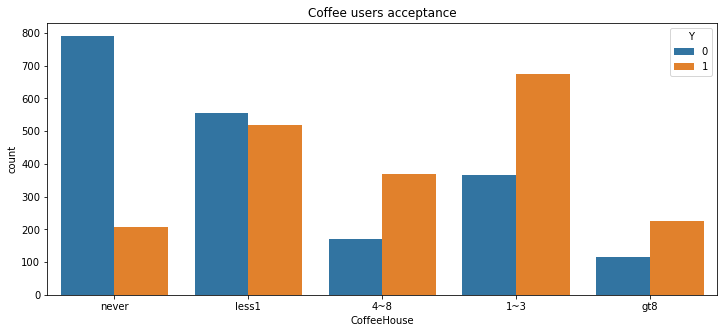

In [68]:
# Compare coffee house coupon acceptance for different coffee users 

plt.figure(figsize=(12,5))
#plt.subplot(121)
plt.title("Coffee users acceptance")
sns.countplot(x="CoffeeHouse", hue="Y", data = coffee_data)


<AxesSubplot:title={'center':'Agewise coffee user Acceptace'}, xlabel='CoffeeHouse'>

<Figure size 1440x1080 with 0 Axes>

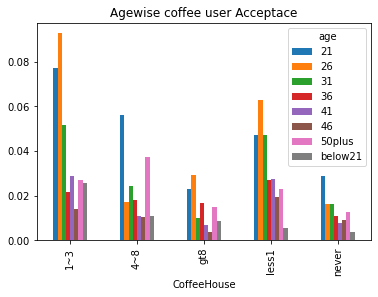

In [72]:
# Compare acceptace of coupons for differenet coffee house users and different age group
pd.crosstab(coffee_data.CoffeeHouse, coffee_data.age, normalize=True, values=coffee_data.Y, aggfunc=np.sum).plot(kind='bar',title='Agewise coffee user Acceptace')

<AxesSubplot:title={'center':'Income wise coffee user Acceptace'}, xlabel='CoffeeHouse'>

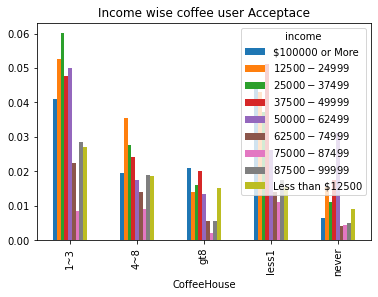

In [70]:
# Compare acceptace of coupons for differenet coffee house users and different income group
pd.crosstab(coffee_data.CoffeeHouse, coffee_data.income, normalize=True, values=coffee_data.Y, aggfunc=np.sum).plot(kind='bar',title='Income wise coffee user Acceptace')

C:\Users\shah_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Acceptance for coffee House visits Vs Direction'}, xlabel='CoffeeHouse', ylabel='direction_opp'>

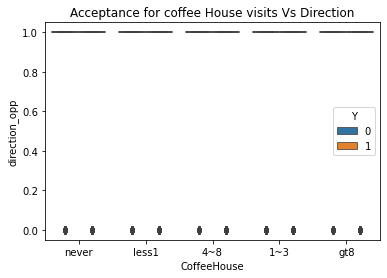

In [84]:
# Chance of accepting coffee house coupon if driving in opposite direction

plt.title("Acceptance for coffee House visits Vs Direction")
sns.boxplot(coffee_data['CoffeeHouse'], coffee_data['direction_opp'], hue="Y", data=coffee_data)

In [ ]:
# Hypothesis for coffee House coupon
# 1. Chance of using coffee house coupon is 50%
# 2. Coffee house coupon are mostly used by drivers who are infrequent coffee house visitors
# 3. Most Coffee coupons are used by people with age less than 30, max is people age 26
# 4. Drivers who are infrequent coffee house visitors and have lower income ( less than 38K) are most to use coupons
# 5. If the coupon is for coffee house which is in opposite direction, the chances of that being used is almost nil.